Title: Predicting Chest Pain Type Based on Resting Blood Pressure and Cholesterol Level in Patients at Risk of Heart Disease.

Introduction:

In this project, we inquire as to whether we can use classification to predict the chest pain type (cp) an individual could suffer from based on Resting Blood Pressure (trestbps) and Serum Cholesterol in mg/dl (chol). The chest pain types include: (value 1: typical angina, value 2: atypical angina, value 3: non-anginal pain, value 4: asymptomatic). Angina (chest pain) is a primary indicator of heart disease and the types of pain experienced can be used to diagnose and assess the severity of the condition (Nakias et al., 2018). As high levels of cholesterol and irregular resting blood have correlation with atypical angina (Mosby, 2004), we are curious to see if these variables can predict the kinds of chest pain in patients with heart disease.
Predicting chest pain type can be beneficial to individuals at risk of heart disease as healthcare providers can identify what symptoms a patient should be monitoring for in order to get crucial care faster. The multivariate dataset we will be using to make these classifications is the Heart Disease dataset from the subject of Health and Medicine.
Later, we decided to test our model once more, replacing cp with resting electrocardiographic results (ECG).

Methods:


We will be making a model for KNN classification data analysis which can determine the categorical label “type of heart pain patients have” based on their “resting blood pressure” and “cholesterol” with the nearest neighbours algorithm. We will use test results data from the Cleveland Clinic in Ohio which predicted the diagnoses of heart disease based on numeric, integer and categorical variables.
We will be keeping the columns cp (chest pain type), resting blood pressure (resting blood pressure), and cholesterol (chol) (serum cholesterol in mg/dl). We will standardize our variables for comparison Our classification model will produced using tidymodels, We will split the data by 80:20 to form training and testing sets of data then further split our training data to evaluate our model using the “metrics” function on “accuracy”, “precision” and “recall” to visualize the results of our evaluation of our classifier on a scatter plot, specifically plot metrics like accuracy vs. k We will classify the chest pain as one of the four categories: 1: typical angina 2: atypical angina 3: non-anginal pain 4: asymptomatic.

Expected outcomes and significance:


We expect to be able to predict and classify the type of chest pain a patient is experiencing as typical angina, atypical angina, non-anginal pain, or asymptomatic based only on the numerical categories: cholesterol and resting blood pressure. What impact could such findings have? These findings could have impacts in the area of healthcare. It could be used to classify potential chest pain type based on physical testing (blood test for cholesterol and blood pressure cuff for measuring blood pressure) What future questions could this lead to? This classification could lead to future questions about how cholesterol levels and resting blood pressure levels are related to chest pain, and, in turn, related to heart disease. It would give healthcare professionals additional information to use in their clinics to better treat patients with chest pain and potentially heart disease.

We will start by installing the necessary libraries for our classification. This includes the tidyverse, repr, and tidymodels libraries.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

We begin by reading the heart disease csv file into R from the web. 

In [2]:
print("Table 1: The Main Heart Disease Dataset.")

url <- "https://raw.githubusercontent.com/Ellaj1/Group-31/main/processed.cleveland.data"
heart_disease <- read_csv(url, col_names = FALSE) 
colnames(heart_disease) <- c("age", "sex", "cp", "trestbps", "chol",
                         "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_disease$sex <- as.factor(heart_disease$sex)
heart_disease$cp <- as.factor(heart_disease$cp)
heart_disease$fbs <- as.factor(heart_disease$fbs)
heart_disease$restecg <- as.factor(heart_disease$restecg)
heart_disease$exang <- as.factor(heart_disease$exang)
heart_disease$slope <- as.factor(heart_disease$slope)
heart_disease$thal <- as.factor(heart_disease$thal)
heart_disease

[1] "Table 1: The Main Heart Disease Dataset."


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


Next, we select the columns that we're interested in. In this case, these columns include resting heart rate, cholesterol and chest pain type. 

In [6]:
print("Table 2: Selected Heart Disease Dataset")



heart_disease_select <- heart_disease|>
select(trestbps,chol,cp)

heart_disease_select

print("Table 3: Counting the patients for each chest pain level.")

heart_disease_select |> 
group_by(cp) |> 
summarize(n = n())

install.packages("themis") 
library(themis) 


ups_recipe <- recipe(cp ~ ., data = heart_disease_select) |> 
step_upsample(cp, over_ratio = 1, skip = FALSE) |> 
step_center(all_predictors())|>
step_scale(all_predictors())|>
prep() 

print("Table 4: Balancing the count for each chest pain.")

heart_disease_classes <- bake(ups_recipe, heart_disease_select) 

heart_disease_classes |> 
group_by(cp) |> 
summarize(n = n())

[1] "Table 2: Selected Heart Disease Dataset"


trestbps,chol,cp
<dbl>,<dbl>,<fct>
145,233,1
160,286,4
120,229,4
130,250,3
130,204,2
120,236,2
140,268,4
120,354,4
130,254,4


[1] "Table 3: Counting the patients for each chest pain level."


cp,n
<fct>,<int>
1,23
2,50
3,86
4,144


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



[1] "Table 4: Balancing the count for each chest pain."


cp,n
<fct>,<int>
1,144
2,144
3,144
4,144


We must set the seed so that our work is reproducible. Then, we split the data into our training and testing sets. 

In [7]:
set.seed(3456)

print("Table 5: Heart Disease Training Set.")

heart_disease_split <- initial_split(heart_disease_classes, prop = 0.75, strata = cp)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

heart_disease_train
print("Table 6: Heart Disease Test Set")

heart_disease_test

[1] "Table 5: Heart Disease Training Set."


trestbps,chol,cp
<dbl>,<dbl>,<fct>
1.29076596,0.62835095,1
1.80589185,-0.39198286,1
2.21799256,0.56180744,1
0.67261490,-0.01490297,1
-0.04856135,-0.90214977,1
-1.28486348,0.42872042,1
1.80589185,-0.39198286,1
0.77564007,0.85016265,1
-1.28486348,-0.74688158,1


[1] "Table 6: Heart Disease Test Set"


trestbps,chol,cp
<dbl>,<dbl>,<fct>
1.80589185,-0.39198286,1
-0.04856135,-0.90214977,1
1.80589185,0.96106850,1
-0.87276277,-1.39013550,1
0.67261490,-0.01490297,1
-0.76973759,-1.14614263,1
0.26051419,-1.01305562,1
-0.87276277,-1.30141082,1
2.21799256,0.56180744,1


We make a summary statistic, grouping by chest pain type and finding the average of both the resting heart rate and of the cholesterol level. 

In [8]:
heart_disease_tidy <- heart_disease_train |>
group_by(cp)|>
summarize(mean_trestbps = mean(trestbps, na.rm = TRUE), mean_chol = mean(chol, na.rm = TRUE))

print("Table 7: Heart Disease Tidy")

heart_disease_tidy

[1] "Table 7: Heart Disease Tidy"


cp,mean_trestbps,mean_chol
<fct>,<dbl>,<dbl>
1,0.4145750,-0.19604919
2,-0.2407796,0.06971408
3,-0.1396623,-0.01736755
4,-0.1210605,0.13256073


Finally we create an initial visualization of resting blood pressure vs cholesterol levels, using colour and shape to categorize chest pain type. 

[1] "Figure 1: Initial Visualization of Resting Blood Pressure vs Cholesterol Levels."


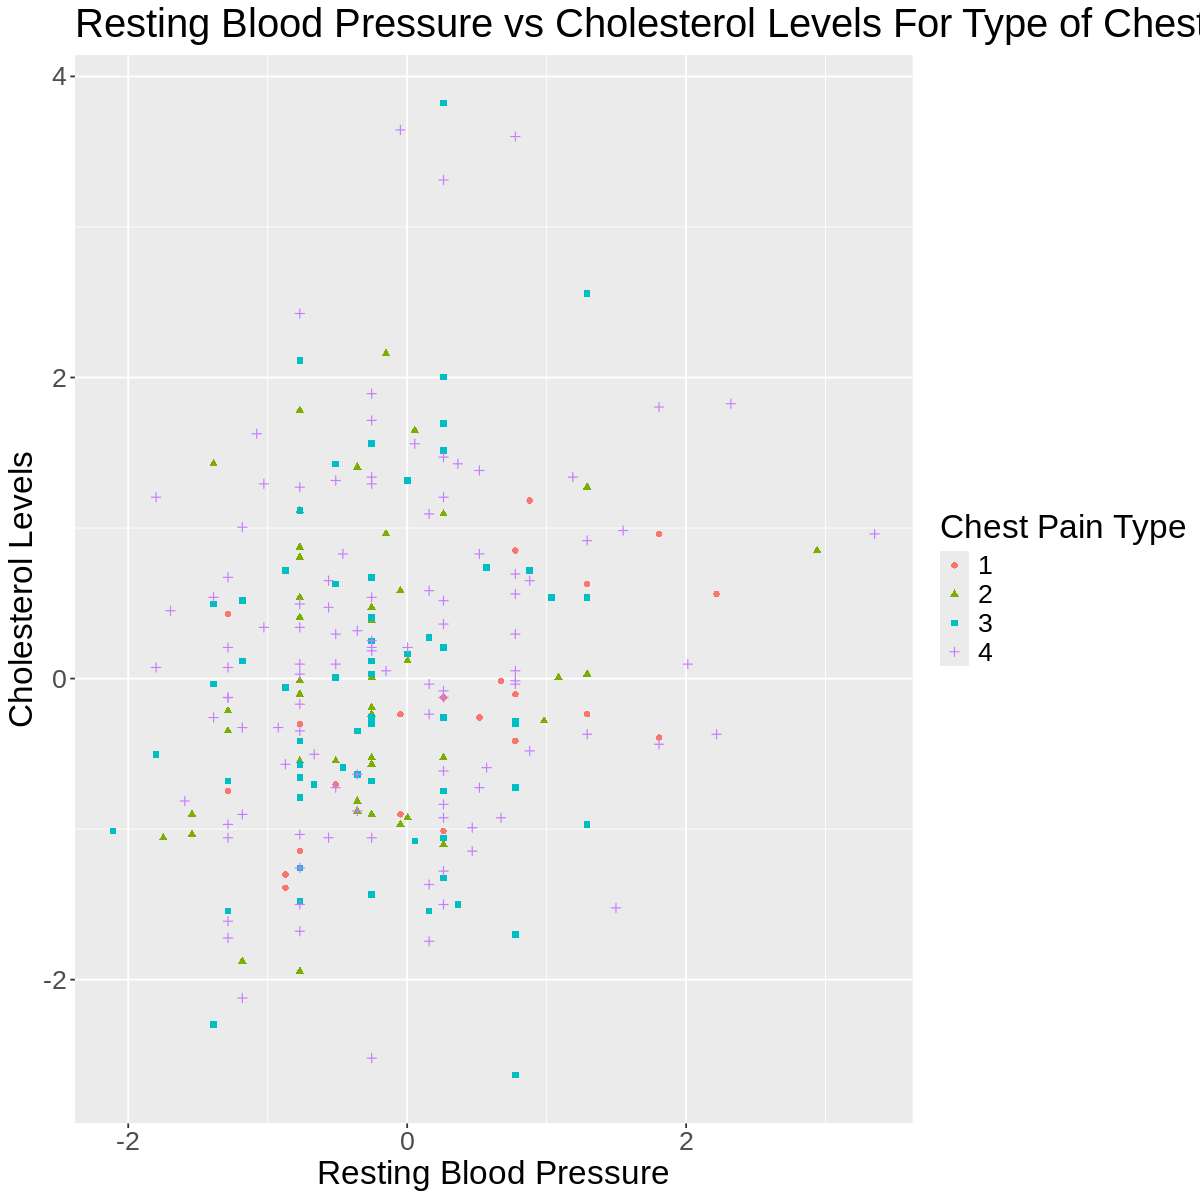

In [9]:
print("Figure 1: Initial Visualization of Resting Blood Pressure vs Cholesterol Levels.")

options(repr.plot.height = 10, repr.plot.width = 10)
Visualization <- heart_disease_train |>
ggplot(aes(x = trestbps, y = chol)) +
       geom_point(aes(colour = cp, shape = cp)) +
labs(x = "Resting Blood Pressure", y = "Cholesterol Levels", colour = "Chest Pain Type", shape = "Chest Pain Type") +
ggtitle("Resting Blood Pressure vs Cholesterol Levels For Type of Chest Pain") +
  theme(text = element_text(size = 20))
Visualization

We then plot the graph (Figure 2) below to help us choose a K value for our classification. We can see from the graph that K = 1. 

[1] "Figure 2: Neighbors Vs. Mean Accuracy"


[1] 1

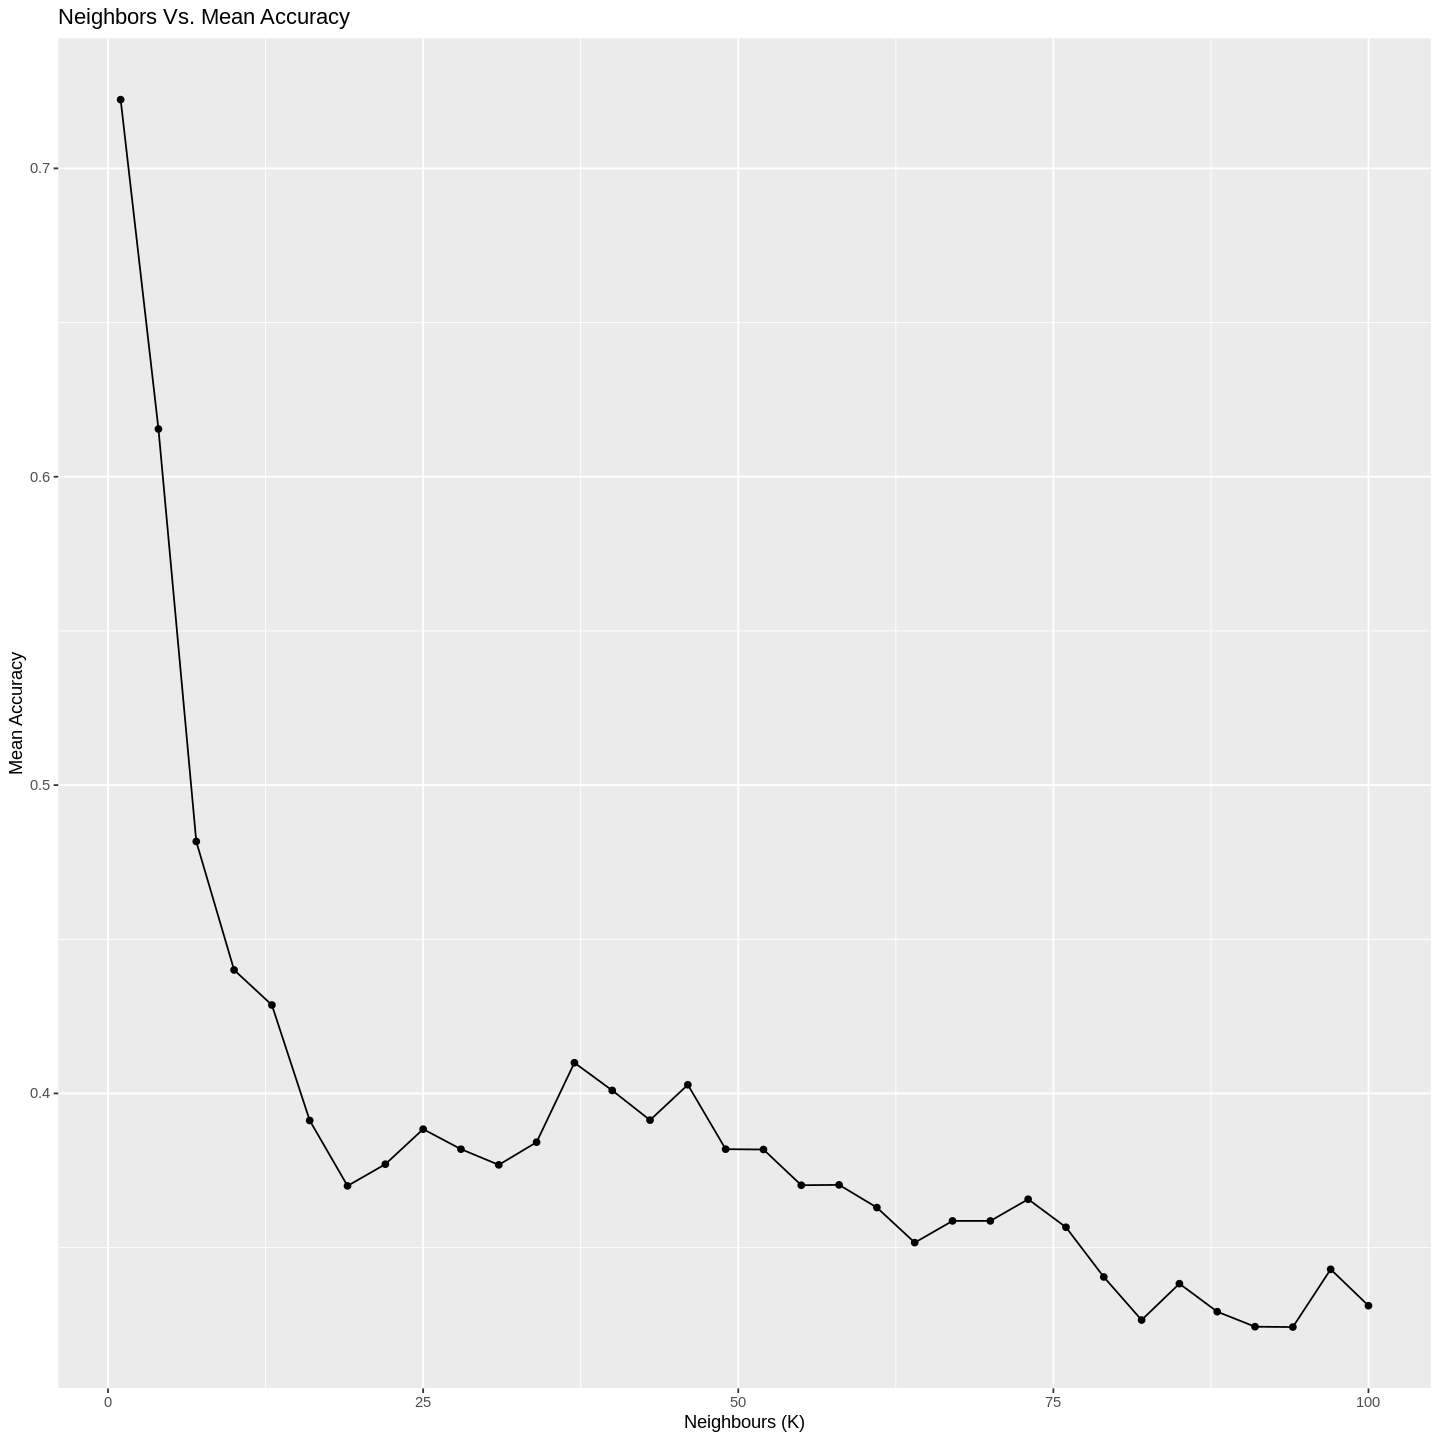

In [13]:
set.seed(3456)

options(repr.plot.height = 12, repr.plot.width = 12)

vfold <- vfold_cv(heart_disease_train, v = 5, strata = cp)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

recipe_knn <- recipe(cp ~ ., data = heart_disease_train)|>
step_center(all_predictors())|>
step_scale(all_predictors())

values <- tibble(neighbors=seq(from = 1, to = 100, by = 3))

knn_fit <- workflow() |>
add_recipe(recipe_knn) |>
add_model(knn_tune) |>
tune_grid(resamples = vfold, grid = values) |>
collect_metrics()|>
filter(.metric == "accuracy")

cross_val_plot <- knn_fit |>
ggplot(aes(x = neighbors, y=mean)) +
geom_point() +
geom_line() +
labs(x = "Neighbours (K)", y = "Mean Accuracy", title = "Neighbors Vs. Mean Accuracy")

cross_val_plot

print("Figure 2: Neighbors Vs. Mean Accuracy")

best_k <- knn_fit |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

In [14]:
print("Table 8: Heart Disease Predictions.")


heart_disease_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
set_engine("kknn") |>
set_mode("classification")

heart_disease_fit <- workflow() |>
add_recipe(recipe_knn)|>
add_model(heart_disease_spec) |>
fit(data=heart_disease_train)

heart_disease_predictions <- heart_disease_fit |>
predict(heart_disease_test) |>
bind_cols(heart_disease_test)

heart_disease_predictions

heart_disease_metrics <- heart_disease_predictions |>
metrics(truth = cp, estimate = .pred_class) |>
filter(.metric == "accuracy")

print("Table 9: Heart Disease Metrics.")

heart_disease_conf_mat <- heart_disease_predictions |>
conf_mat(truth = cp, estimate = .pred_class)
heart_disease_metrics

print("Table 10: Heart Disease Confusion Matrix.")

heart_disease_conf_mat

[1] "Table 8: Heart Disease Predictions."


.pred_class,trestbps,chol,cp
<fct>,<dbl>,<dbl>,<fct>
1,1.80589185,-0.39198286,1
1,-0.04856135,-0.90214977,1
1,1.80589185,0.96106850,1
1,-0.87276277,-1.39013550,1
1,0.67261490,-0.01490297,1
1,-0.76973759,-1.14614263,1
1,0.26051419,-1.01305562,1
1,-0.87276277,-1.30141082,1
1,2.21799256,0.56180744,1


[1] "Table 9: Heart Disease Metrics."


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7777778


[1] "Table 10: Heart Disease Confusion Matrix."


          Truth
Prediction  1  2  3  4
         1 36  0  2  6
         2  0 34  0 10
         3  0  2 26  4
         4  0  0  8 16

- We can make two graphs now with our testing data, first with the actual classification of chest pain (from testing data), and
then with the predicted chest pain type (from running our model on the training data). Then, we can visually compare these two graphs to see how well our model did on predicting the chest pain type.

[1] "Figure 2 (left): Predicted Chest Pain Type from Cholesterol Levels and Resting Blood Pressure, and Figure 3 (right): Actual Classification of Chest Pain Type from Cholesterol Levels and Resting Blood Pressure."



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




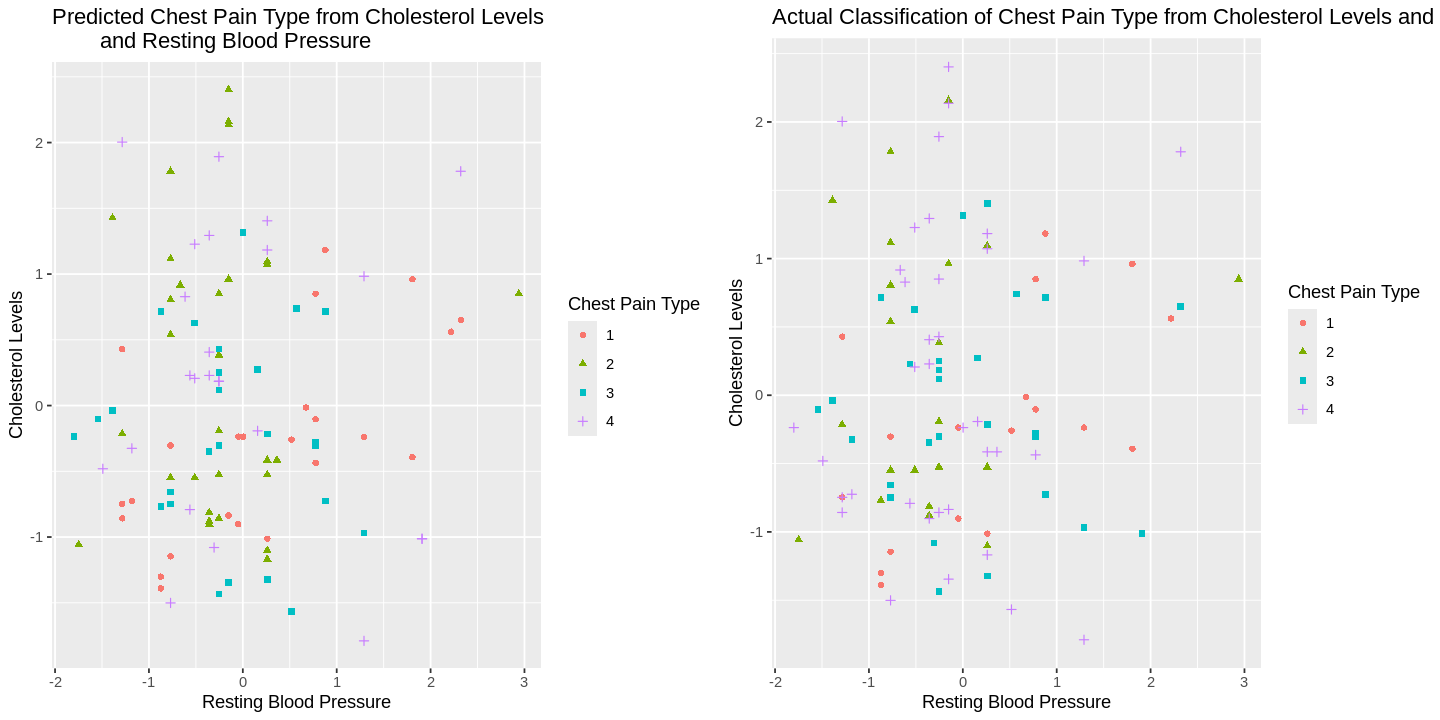

In [15]:
print("Figure 2 (left): Predicted Chest Pain Type from Cholesterol Levels and Resting Blood Pressure, and Figure 3 (right): Actual Classification of Chest Pain Type from Cholesterol Levels and Resting Blood Pressure.")

options(repr.plot.width = 12, repr.plot.height = 6)

heart_disease_test_plot <- ggplot(heart_disease_test, aes(x = trestbps, y = chol, color = cp, shape = cp)) +
    geom_point() +
    labs(x = "Resting Blood Pressure", y = "Cholesterol Levels", color = "Chest Pain Type", shape = "Chest Pain Type") +
ggtitle("Actual Classification of Chest Pain Type from Cholesterol Levels and Resting Blood Pressure")

heart_disease_predictions_plot <- ggplot(heart_disease_predictions, aes(x = trestbps, y = chol, color = .pred_class, shape = .pred_class)) +
    geom_point() +
    labs(x = "Resting Blood Pressure", y = "Cholesterol Levels", color = "Chest Pain Type", shape = "Chest Pain Type") +
ggtitle("Predicted Chest Pain Type from Cholesterol Levels 
        and Resting Blood Pressure")

library(gridExtra)
grid.arrange(heart_disease_predictions_plot, heart_disease_test_plot, ncol = 2)



- Observations in graphs above: observations on right side, top, and most of the middle of graph are accuractely predicted. Some errors classifying between Resting ECG of 0, 1, or 2 on bottom and bottom right side and left side of all observations. This means our model was fairly accurate in predicting the correct classification of chest pain type based on the response variables, resting blood pressure and cholesterol levels.

Now we will run our same model but replacing the variable "chest pain" with "resting electrocardiographic results," in order to see if we can find a stronger relationship with different variables. This will give us an idea if there is a relationship at all between resting blood pressure and cholestorol levels, and whether our model can predict well on other variables.

In [17]:
heart_disease_select_2 <- heart_disease|>
select(trestbps,chol,restecg)

print("Table 11: Selected Heart Disease Dataset 2")
heart_disease_select

#heart_disease_select <- heart_disease|> 
#select(trestbps,chol,cp) 

print("Table 12: Count of Patients for Each Resting ECG Result")

heart_disease_select_2 |> 
group_by(restecg) |> 
summarize(n = n())

install.packages("themis") 
library(themis) 

ups_recipe_2 <- recipe(restecg ~ ., data = heart_disease_select_2) |> 
step_upsample(restecg, over_ratio = 1, skip = FALSE) |> 
step_center(all_predictors())|>
step_scale(all_predictors())|>
prep() 

print("Table 13: Balancing of Rest ECG Values.")

heart_disease_classes_2 <- bake(ups_recipe_2, heart_disease_select_2) 

heart_disease_classes_2 |> 
group_by(restecg) |> 
summarize(n = n())

print("Table 14: Heart Disease Classes 2")

heart_disease_classes_2

[1] "Table 11: Selected Heart Disease Dataset 2"


trestbps,chol,cp
<dbl>,<dbl>,<fct>
145,233,1
160,286,4
120,229,4
130,250,3
130,204,2
120,236,2
140,268,4
120,354,4
130,254,4


[1] "Table 12: Count of Patients for Each Resting ECG Result"


restecg,n
<fct>,<int>
0,151
1,4
2,148


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



[1] "Table 13: Balancing of Rest ECG Values."


restecg,n
<fct>,<int>
0,151
1,151
2,151


[1] "Table 14: Heart Disease Classes 2"


trestbps,chol,restecg
<dbl>,<dbl>,<fct>
-0.27035493,-0.048665148,0
-0.73461113,-0.293418811,0
-0.73461113,1.769504917,0
0.19390126,-1.062644608,0
-0.73461113,0.178606110,0
1.67952109,-0.940267776,0
0.65815746,-1.482222315,0
-1.19886733,-0.415795642,0
0.19390126,-0.240971597,0


In [18]:
set.seed(3456)

heart_disease_split_2 <- initial_split(heart_disease_classes_2, prop=0.75, strata=restecg)
heart_disease_train_2<- training(heart_disease_split_2)
heart_disease_test_2 <- testing(heart_disease_split_2)
print("Table 15 : Heart Disease Training Set 2.")
heart_disease_train_2
print("Table 16: Heart Disease Testing Set 2.")
heart_disease_test_2

[1] "Table 15 : Heart Disease Training Set 2."


trestbps,chol,restecg
<dbl>,<dbl>,<fct>
-0.73461113,-0.293418811,0
0.65815746,-1.482222315,0
-1.19886733,-0.415795642,0
0.19390126,-0.240971597,0
-0.27035493,0.388394964,0
-0.27035493,0.231053324,0
-0.73461113,-0.590619687,0
-0.73461113,1.524751255,0
0.65815746,-0.468242855,0


[1] "Table 16: Heart Disease Testing Set 2."


trestbps,chol,restecg
<dbl>,<dbl>,<fct>
-0.27035493,-0.04866515,0
-0.73461113,1.76950492,0
0.19390126,-1.06264461,0
-0.73461113,0.17860611,0
1.67952109,-0.94026778,0
-0.87388799,-0.39831324,0
0.19390126,-0.94026778,0
-1.43099542,-0.95775018,0
-0.73461113,-1.13257423,0


In [19]:
heart_disease_tidy_2 <- heart_disease_train_2 |>
group_by(restecg)|>
summarize(mean_trestbps = mean(trestbps, na.rm=TRUE), mean_chol = mean(chol, na.rm=TRUE))
print("Table 17: Heart Disease Tidy 2.")
heart_disease_tidy_2

[1] "Table 17: Heart Disease Tidy 2."


restecg,mean_trestbps,mean_chol
<fct>,<dbl>,<dbl>
0,-0.3085636,-0.2538127
1,0.4412307,0.1642179
2,-0.1047839,0.1142461


[1] "Figure 4: Resting Blood Pressure vs Cholesterol Levels For Resting ECG Results."


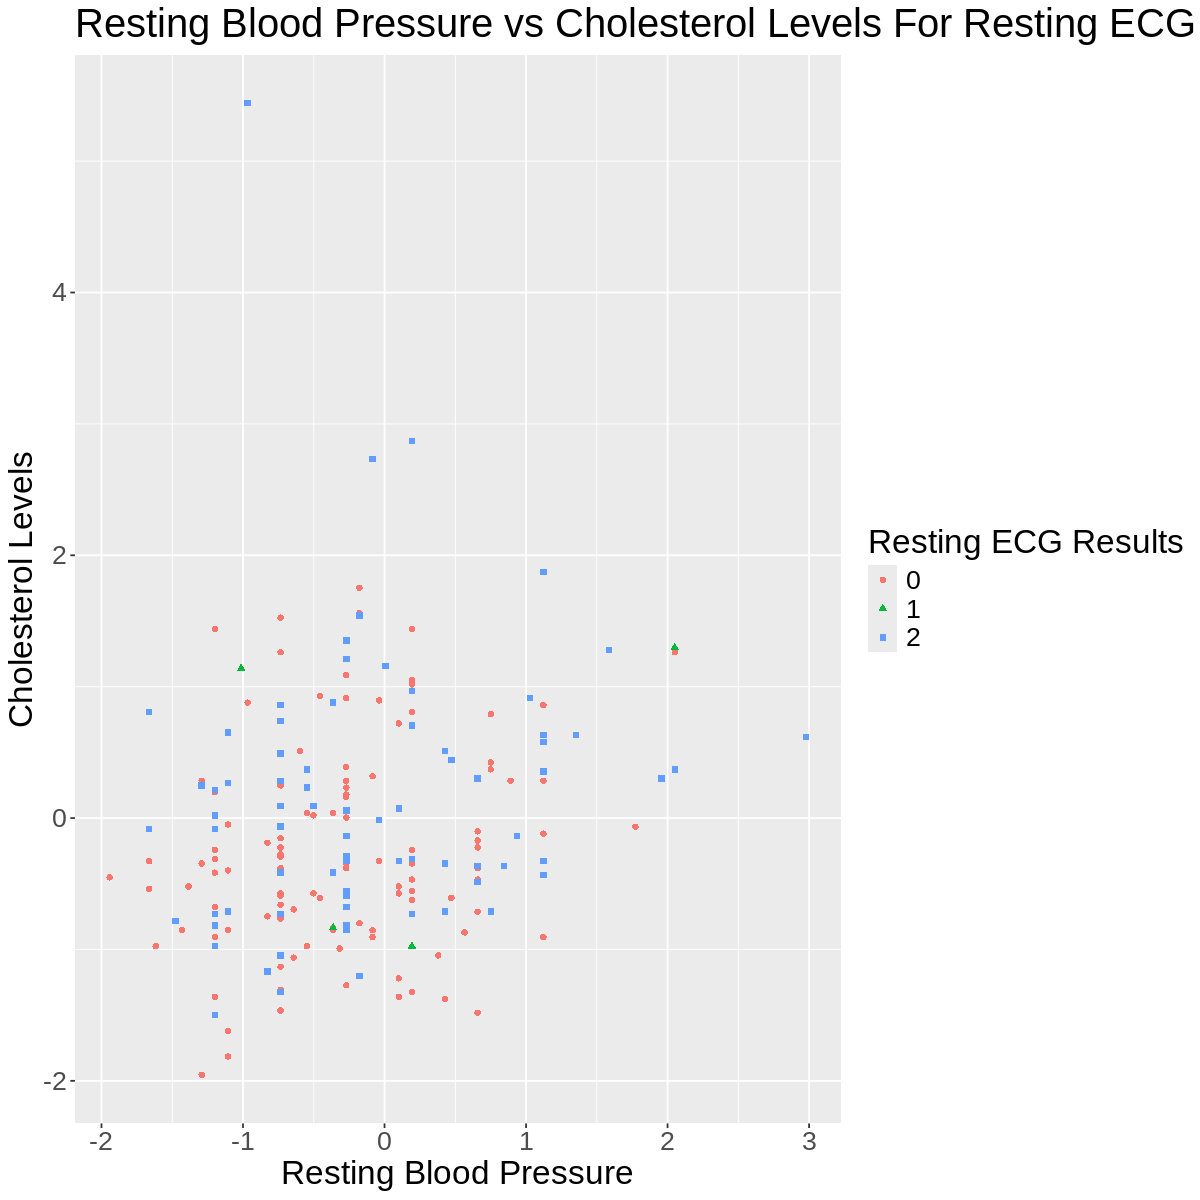

In [20]:
print("Figure 4: Resting Blood Pressure vs Cholesterol Levels For Resting ECG Results.")

options(repr.plot.height = 10, repr.plot.width = 10)

Visualization_2 <- heart_disease_train_2 |> ggplot(aes(x = trestbps, y = chol)) +
    geom_point(aes(colour = restecg, shape = restecg)) +
    labs(x = "Resting Blood Pressure", y = "Cholesterol Levels", colour = "Resting ECG Results", shape = "Resting ECG Results") +
    ggtitle("Resting Blood Pressure vs Cholesterol Levels For Resting ECG Results") +
    theme(text = element_text(size = 20))

Visualization_2

[1] "Figure 5: Neighbors Vs. Mean Accuracy 2"


[1] 4

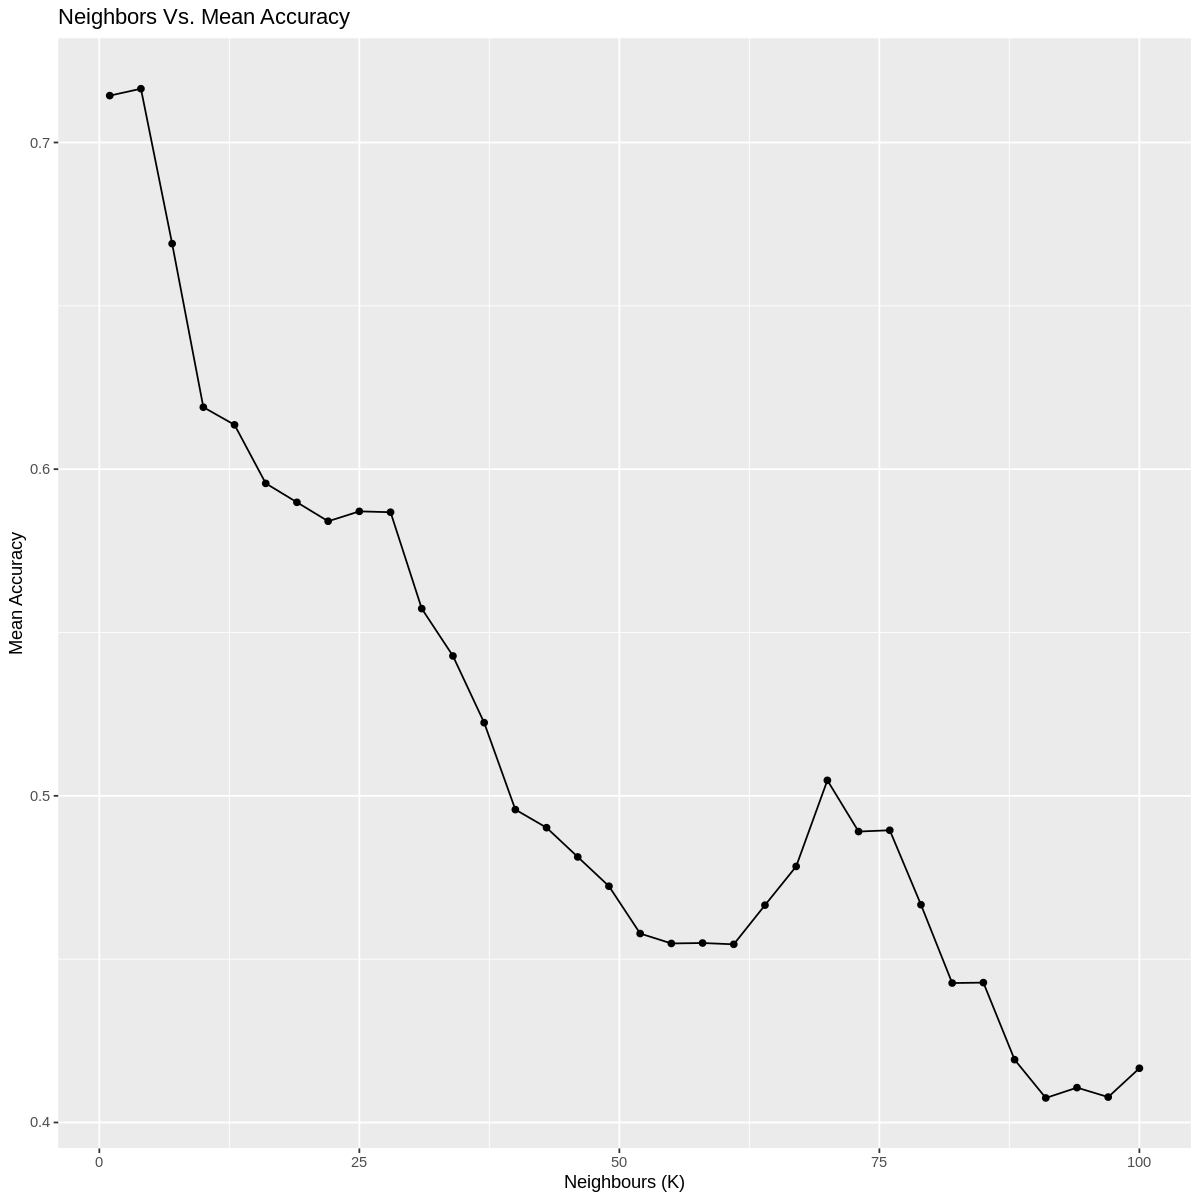

In [21]:
print("Figure 5: Neighbors Vs. Mean Accuracy 2")

set.seed(3456)

options(repr.plot.height = 10, repr.plot.width = 10)

vfold_2 <- vfold_cv(heart_disease_train_2, v = 5, strata = restecg)

knn_tune_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")


recipe_knn_2 <- recipe(restecg ~ ., data = heart_disease_train_2)|>
step_center(all_predictors())|>
step_scale(all_predictors())

values_2 <- tibble(neighbors = seq(from = 1, to = 100, by = 3))

knn_fit_2 <- workflow() |>
add_recipe(recipe_knn_2) |>
add_model(knn_tune_2) |>
tune_grid(resamples = vfold_2, grid = values) |>
collect_metrics() |>
filter(.metric == "accuracy")

cross_val_plot_2 <- knn_fit_2 |> ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbours (K)", y = "Mean Accuracy", title = "Neighbors Vs. Mean Accuracy")

cross_val_plot_2

best_k_2 <- knn_fit_2 |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)

best_k_2

Choose K=4 from graph above - has highest accuracy.

In [22]:
heart_disease_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
set_engine("kknn") |>
set_mode("classification")

heart_disease_fit_2 <- workflow() |>
add_recipe(recipe_knn_2) |>
add_model(heart_disease_spec_2) |>
fit(data=heart_disease_train_2)

heart_disease_predictions_2 <- heart_disease_fit_2 |>
predict(heart_disease_test_2)|>
bind_cols(heart_disease_test_2)

print("Table 17: Heart Disease Predictions 2.")
heart_disease_predictions_2

heart_disease_metrics_2 <- heart_disease_predictions_2 |>
metrics(truth = restecg, estimate=.pred_class) |>
filter(.metric == "accuracy")

heart_disease_conf_mat_2 <- heart_disease_predictions_2 |>
conf_mat(truth = restecg, estimate = .pred_class)
print("Table 18: Heart Disease Metrics 2")
heart_disease_metrics_2
print("Table 19: Heart Disease Confusion Matrix 2")
heart_disease_conf_mat_2

[1] "Table 17: Heart Disease Predictions 2."


.pred_class,trestbps,chol,restecg
<fct>,<dbl>,<dbl>,<fct>
0,-0.27035493,-0.04866515,0
0,-0.73461113,1.76950492,0
1,0.19390126,-1.06264461,0
2,-0.73461113,0.17860611,0
2,1.67952109,-0.94026778,0
0,-0.87388799,-0.39831324,0
1,0.19390126,-0.94026778,0
0,-1.43099542,-0.95775018,0
2,-0.73461113,-1.13257423,0


[1] "Table 18: Heart Disease Metrics 2"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.754386


[1] "Table 19: Heart Disease Confusion Matrix 2"


          Truth
Prediction  0  1  2
         0 23  0 11
         1  5 38  2
         2 10  0 25

[1] "Figure 6 (left): Predicted Resting ECG Result from Cholesterol Levels and Resting Blood Pressure, and Figure 7 (right): Actual Classification of Resting ECG Result from Cholesterol Levels and Resting Blood Pressure."


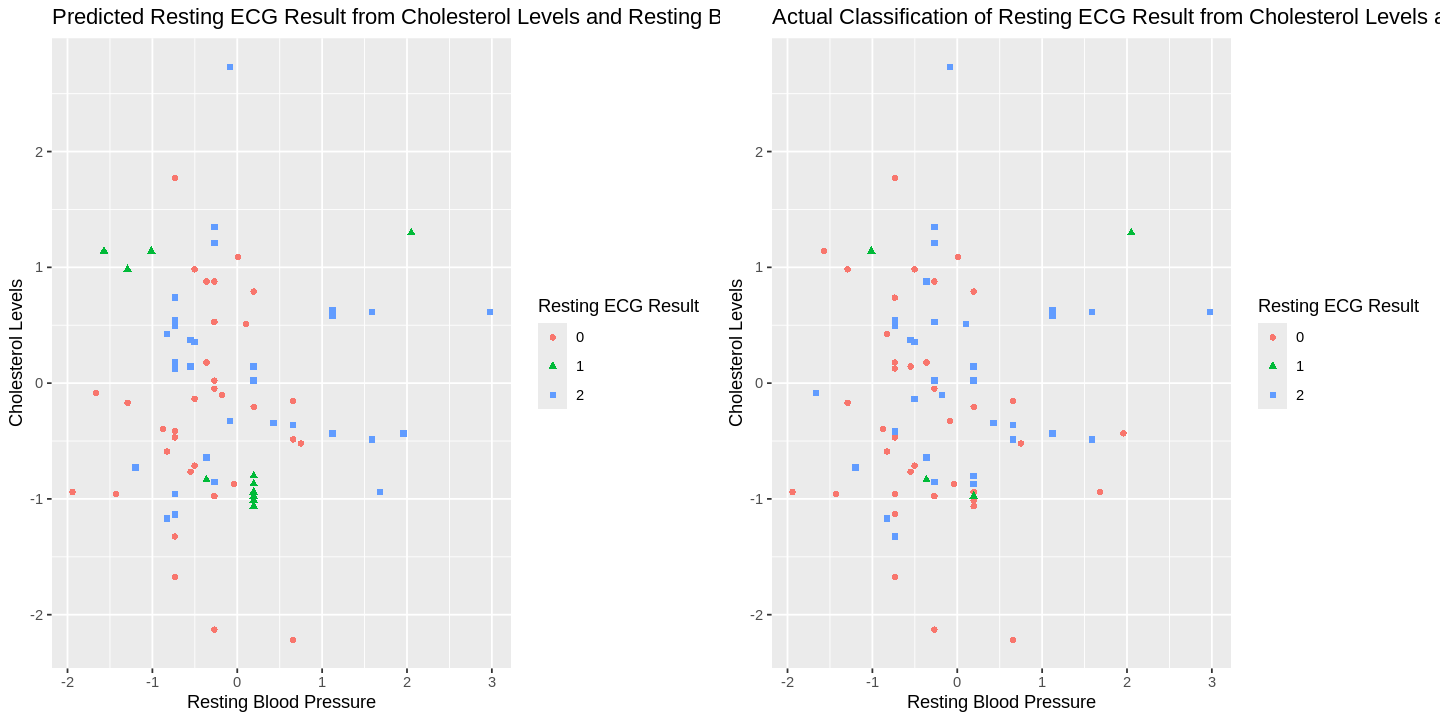

In [23]:
print("Figure 6 (left): Predicted Resting ECG Result from Cholesterol Levels and Resting Blood Pressure, and Figure 7 (right): Actual Classification of Resting ECG Result from Cholesterol Levels and Resting Blood Pressure.")

options(repr.plot.width=12, repr.plot.height=6)

heart_disease_test_plot_2 <- ggplot(heart_disease_test_2, aes(x = trestbps, y = chol, color = restecg, shape = restecg)) +
    geom_point() +
    labs(x = "Resting Blood Pressure", y = "Cholesterol Levels", color = "Resting ECG Result", shape = "Resting ECG Result") +
    ggtitle("Actual Classification of Resting ECG Result from Cholesterol Levels and Resting Blood Pressure")

heart_disease_predictions_plot_2 <- ggplot(heart_disease_predictions_2, 
                                           aes(x = trestbps, y = chol, color = .pred_class, shape = .pred_class)) +
    geom_point() +
    labs(x ="Resting Blood Pressure", y = "Cholesterol Levels", color = "Resting ECG Result", shape = "Resting ECG Result") +
    ggtitle("Predicted Resting ECG Result from Cholesterol Levels and Resting Blood Pressure")

library(gridExtra)
grid.arrange(heart_disease_predictions_plot_2,heart_disease_test_plot_2, ncol = 2)

- These two graphs are our model's predicted Resting ECG Result next to the actual classification based on the heart disease csv data.
- Because these graphs are very similiar, this means our model did a good job predicting the correct classification of  the target variable, Resting ECG, based on the predictors (same as before), cholesterol levels and resting blood pressure.
- Our model here is different from the one we used when we had our target variable as chest pain type
- We can conclude from doing this classification with different target variables, that there is a stronger relationship between cholesterol and resting blood pressure to ECG results than chest pain. This is because the graphs that compare actual vs predicted classes (Figure x and x), show that the model was less accurate for the chest pain target variable than the ECG target variable.

- Observations in graphs above: observations on right side, bottom, and middle, of graph are accuractely predicted. Some errors classifying between Resting ECG of 0, 1, or 2 on top left had side.

Discussion: 
Using classification, we were able to create visualizations which predicted both chest pain type and resting electrocardiographic results, based on the cholesterol levels and resting blood pressures (RBP) of patients in this trial. Our model, for both scenarios was found to be a good predictor for the variables under investigation (0.81 and 0.73 accuracy respectively), pointing to a high degree of accuracy in the model.

However, the model had difficulty in correctly predicting the labels of patients with type 4 chest pain, they were characterized disproportionately as types 1, 2 and 3 chest pain. Considering type 4 chest pain is asymptomatic, if this model were employed, asymptomatic patients might be told they were at risk of certain chest pains incorrectly. This outcome is preferable to patients at risk being misinformed about their chest pain predictions. 

This model at large provides useful information for medical researchers and practitioners. Administered care for chest pain type may be facilitated if medical staff know what variables are associated with different pain types. Additionally, narrowing the options for what health variables should be monitored and maintained will lead to more efficient treatment plans, and can lead to a deeper understanding of heart disease.

As we were curious if our model could accurately predict another target variable, we tried the same process using the “predicting resting electrocardiographic results” variable, or ECG instead of chest pain type. This ECG is a non-invasive medical test which can identify many health conditions, including heart disease. (N.G.C., 2016). As cholesterol and high resting blood pressure are generally associated with heart disease, we wanted to test to see if our classification could be applied to a variable which is more likely to be correlated with the predictors, and demonstrate that association.

Our model for predicting ECG results was found to be less accurate than when we predicted chest pain types. Not only this, but the model frequently misclassified patients with Value 2 results (probable left ventricular hypertrophy) as having Value 0 results (normal) and vice versa. Meaning that if this model were to be used, it would be likely that patients who would attain Value 2 ECG results would not know anything is amiss, suggesting a need to refine the model and its parameters.

 In our second use of the model, we practiced predicting outcomes of an existing test. Generally, it may be more useful to predict the outcomes of a medical test accurately, rather than predicting a symptom.
This is because medical professionals will value knowledge centred around the root problem more than the side effects that come alongside it.
Being able to accurately predict if a person has heart disease based on their RBP and cholesterol levels may be easier than running tests on the patient to determine the truth. This is especially true since more patients at risk of heart disease monitor their RBP and cholesterol levels regularly and could obtain an accurate prediction of where they stand much more efficiently than by running tests repeatedly. Using a similar model, patients may develop a heightened understanding of how at risk they are of heart disease. Finally, in many countries, medical testing can be very expensive, and this classification could serve as a good initial alternative to the testing on patients who have no history of heart disease but may be experiencing symptoms.
 
In the future, it would be beneficial to find the two variables which most accurately predict ECG results and create an accessible predictive model based on this. Furthermore, finding the traits which cannot be used to predict heart disease is worth studying, as they may be classified as effects of heart disease, rather than future predictors.

Citations (APA):

Heart disease. UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/45/heart+disease

Mosby. (2004b, February 27). The relation of the systolic blood pressure and heart rate to attacks of angina pectoris precipitated by effort. American Heart Journal. https://www.sciencedirect.com/science/article/abs/pii/S0002870336908839

Nakias, N., Bechlioulis, A., & et. al.,. (2018, June 8). The importance of characteristics of angina symptoms for the prediction of coronary artery disease in a cohort of stable patients in the modern era. Hellenic Journal of Cardiology. https://www.sciencedirect.com/science/article/pii/S1109966618300277

(UK), N. G. C. (n.d.). Resting electrocardiography. Preoperative Tests (Update): Routine Preoperative Tests for Elective Surgery. https://www.ncbi.nlm.nih.gov/books/NBK367910/#:~:text=Resting%2012%2Dlead%20electrocardiography%20(ECG,hypertrophy%20and%20bundle%20branch%20blocks.